In [209]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [210]:
data_heart=pd.read_csv('Documents/Data science/Heart_Disease_Prediction.csv')
data=data_heart.copy()

In [211]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
Age                        270 non-null int64
Sex                        270 non-null int64
Chest pain type            270 non-null int64
BP                         270 non-null int64
Cholesterol                270 non-null int64
FBS over 120               270 non-null int64
EKG results                270 non-null int64
Max HR                     270 non-null int64
Exercise angina            270 non-null int64
ST depression              270 non-null float64
Slope of ST                270 non-null int64
Number of vessels fluro    270 non-null int64
Thallium                   270 non-null int64
Heart Disease              270 non-null object
dtypes: float64(1), int64(12), object(1)
memory usage: 29.6+ KB


In [212]:
data.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [213]:
data.describe(include='O')

,Heart Disease
count,270
unique,2
top,Absence
freq,150


In [214]:
data.shape

(270, 14)

In [215]:
data.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [216]:
data.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [217]:
data['Age'].value_counts().sort_index()

29     1
34     2
35     3
37     2
38     1
39     3
40     3
41     9
42     8
43     7
44    10
45     7
46     7
47     4
48     7
49     5
50     7
51    12
52    11
53     7
54    16
55     6
56     9
57    12
58    15
59    12
60    12
61     7
62    11
63     7
64     9
65     8
66     6
67     8
68     3
69     3
70     4
71     3
74     1
76     1
77     1
Name: Age, dtype: int64

In [218]:
correlation=data.corr()
correlation

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
Age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100
Sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046
Chest pain type,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659
BP,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045
Cholesterol,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836
FBS over 120,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237
EKG results,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337
Max HR,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397
Exercise angina,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449
ST depression,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333


In [219]:
gender=pd.crosstab(index=data['Sex'],columns='count',normalize=True)
gender

col_0,count
Sex,
0,0.322222
1,0.677778


In [220]:
gender_attack=pd.crosstab(index=data['Sex'],columns=data['Heart Disease'],margins=True,normalize='index')#row wise probability is 1
gender_attack    

Heart Disease,Absence,Presence
Sex,,
0,0.770115,0.229885
1,0.453552,0.546448
All,0.555556,0.444444


In [221]:
pd.crosstab(index=data['Age'],columns=data['Heart Disease'],margins=True,normalize='index')

Heart Disease,Absence,Presence
Age,,
29,1.000000,0.000000
34,1.000000,0.000000
35,0.333333,0.666667
37,1.000000,0.000000
38,0.000000,1.000000
39,0.666667,0.333333
40,0.333333,0.666667
41,0.888889,0.111111
42,0.875000,0.125000


In [222]:
data['Heart Disease'].value_counts()

Absence     150
Presence    120
Name: Heart Disease, dtype: int64

In [223]:
heart_attack={'Absence':0 ,'Presence':1}
data.replace(heart_attack,inplace=True)

In [224]:
data.drop_duplicates(keep='first',inplace=True)

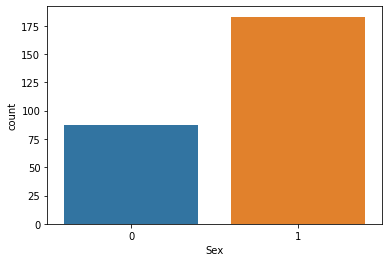

In [225]:
sns.countplot(data['Sex'])

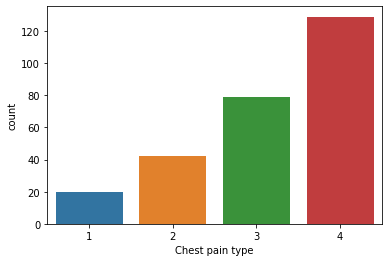

In [226]:
sns.countplot(data['Chest pain type'])

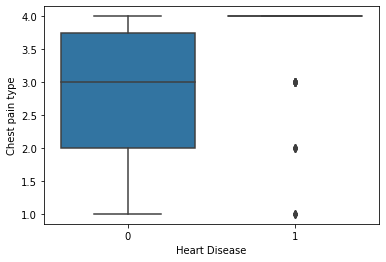

In [227]:
sns.boxplot('Heart Disease','Chest pain type',data=data)

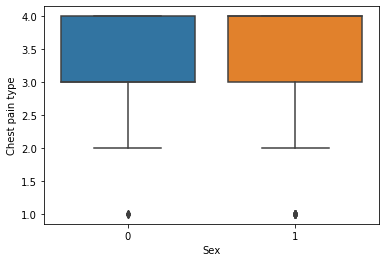

In [228]:
sns.boxplot('Sex','Chest pain type',data=data)

In [229]:
data['Sex'].value_counts()

1    183
0     87
Name: Sex, dtype: int64

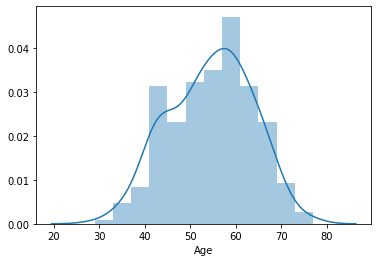

In [230]:
sns.distplot(data['Age'])

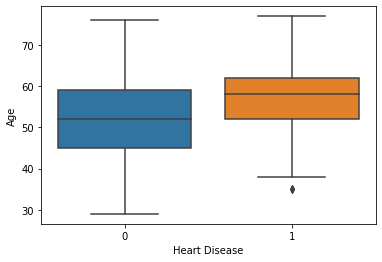

In [231]:
sns.boxplot('Heart Disease','Age',data=data)

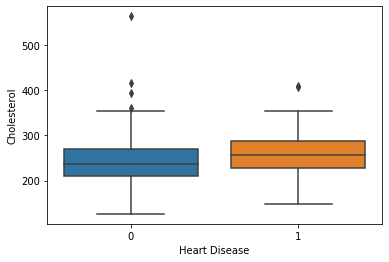

In [232]:
sns.boxplot('Heart Disease','Cholesterol',data=data)

In [233]:
data.groupby('Heart Disease').median()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
Heart Disease,,,,,,,,,,,,,
0,52.0,1.0,3.0,130.0,236.0,0.0,0.0,161.0,0.0,0.2,1.0,0.0,3.0
1,58.0,1.0,4.0,130.0,255.5,0.0,2.0,141.5,1.0,1.4,2.0,1.0,7.0


In [234]:
data.groupby('Heart Disease')['Age'].median()

Heart Disease
0    52
1    58
Name: Age, dtype: int64

In [235]:
column_list=list(data.columns)

In [236]:
features=list(set(column_list)-set(['Heart Disease']))

In [237]:
features

['Cholesterol',
 'BP',
 'Age',
 'Exercise angina',
 'Slope of ST',
 'Chest pain type',
 'Number of vessels fluro',
 'Sex',
 'ST depression',
 'Thallium',
 'FBS over 120',
 'EKG results',
 'Max HR']

In [238]:
y=data['Heart Disease'].values
y

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1], dtype=int64)

In [239]:
x=data[features].values
x

array([[322., 130.,  70., ...,   0.,   2., 109.],
       [564., 115.,  67., ...,   0.,   2., 160.],
       [261., 124.,  57., ...,   0.,   0., 141.],
       ...,
       [294., 140.,  56., ...,   0.,   2., 153.],
       [192., 140.,  57., ...,   0.,   0., 148.],
       [286., 160.,  67., ...,   0.,   2., 108.]])

In [240]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=0)
logistic=LogisticRegression()

In [241]:
logistic.fit(train_x,train_y)

C:\Users\rochan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [242]:
prediction=logistic.predict(test_x)
prediction

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1], dtype=int64)

In [243]:
confus_matrix=confusion_matrix(test_y,prediction)
confus_matrix

array([[43,  5],
       [ 5, 28]], dtype=int64)

In [244]:
accu_score=accuracy_score(test_y,prediction)
accu_score

0.8765432098765432

In [245]:
print("Missclassified samples are %d" % (test_y!=prediction).sum())

Missclassified samples are 10


In [246]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [247]:
KNN_classifier = KNeighborsClassifier(n_neighbors=18)

In [248]:
KNN_classifier.fit(train_x,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                     weights='uniform')

In [249]:
prediction=KNN_classifier.predict(test_x)
prediction

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [250]:
confusion_matrix=confusion_matrix(test_y,prediction)
confusion_matrix

array([[38, 10],
       [11, 22]], dtype=int64)

In [251]:
accuracy_score=accuracy_score(test_y,prediction)
accuracy_score

0.7407407407407407

In [252]:
print('Misclassified samples : %d' % (test_y != prediction).sum())

Misclassified samples : 21


In [253]:
Misclassified_sample=[]
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x,train_y)
    pred_i=knn.predict(test_x)
    Misclassified_sample.append((test_y!=pred_i).sum())

In [254]:
Misclassified_sample

[40, 32, 29, 29, 29, 24, 31, 26, 29, 24, 28, 25, 24, 25, 27, 24, 22, 21, 26]

In [255]:
report=classification_report(prediction,test_y)

In [256]:
report

'              precision    recall  f1-score   support\n\n           0       0.79      0.78      0.78        49\n           1       0.67      0.69      0.68        32\n\n    accuracy                           0.74        81\n   macro avg       0.73      0.73      0.73        81\nweighted avg       0.74      0.74      0.74        81\n'